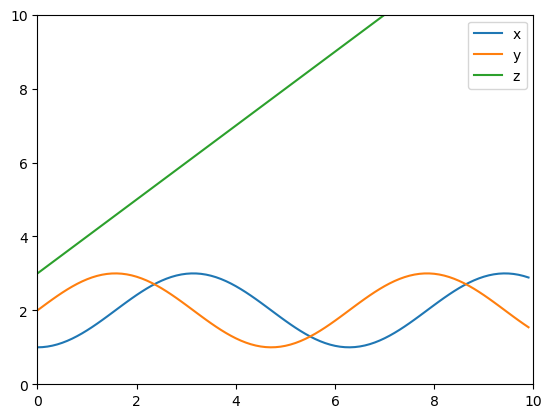

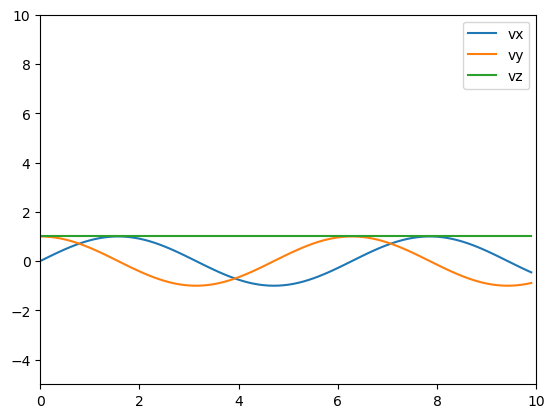

Text(0.5, 0, 'z')

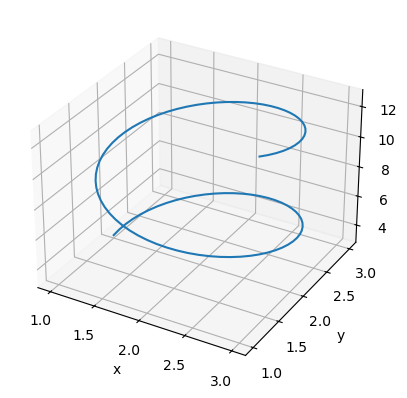

In [405]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#Single Particle Motion
#Applied Electric Field
E=[0,0,0]
#Applied Magnetic Field 
B=[0,0,1]
#Charge and Mass
q=1.6*10**-19
m=9.01*10**-31

#Defining the equations
def Drift_Model(x,t):
    dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt = x 
    dxdt= x[3]
    dydt= x[4]
    dzdt= x[5]
    dvxdt= q/m*E[0] + x[4]*B[2] - x[5]*B[1]
    dvydt= q/m*E[1] + x[5]*B[0] - x[3]*B[2]
    dvzdt= q/m*E[2] + x[3]*B[1] - x[4]*B[0]

    Eqs=[dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt]
    return(Eqs)

#Initial Conditions
IC=[1,2,3,0,1,1]

#Time Array
t=np.arange(0,10,0.1)

#Solving the Equation
Sol=odeint(Drift_Model, IC,t)

#Extracting & Plotting the solution for variation in space
for i in range(0,3):
    plt.plot(t,Sol[:,i])
    
plt.axis([0,10, 0,10])
plt.legend(["x",
            "y",
            "z"])
plt.show()

#Extracting & Plotting the solution for variation in velocity
for j in range(3,6):
    plt.plot(t,Sol[:,j])
    
plt.axis([0,10, -5,10])
plt.legend(["vx",
            "vy",
            "vz"])
plt.show()

from mpl_toolkits.mplot3d import Axes3D
# Create a new figure
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the parametric data
ax.plot(Sol[:,0], Sol[:,1], Sol[:,2], label='Parametric Curve')

# Set labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')